In [2]:
import numpy as np
import pickle as pk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec as gs
import networkx as nx

In [3]:
# load data
dest_folder = '/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/NMF_output/'

df = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/rep1_spikein_curated.xls')
ribo = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/ribo_curated.xls')
ribo_hen = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/references/Hentschel_etal_ribo.xlsx')
raw_data = np.load('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/packed_rep1_spikein.npy')
gff = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/start_over_once_more/references/Msm_gff.xlsx')
reshaped = np.load(dest_folder+'NMF_regrouped.npy')
h = np.load(dest_folder+'NMF_basis.npy')
w = np.load(dest_folder+'NMF_encoding.npy')

snf_data = pk.load(open('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/SNF_output/SNF_output.pk','rb'))
n_components = 20
positions = snf_data['positions']
g = snf_data['network']
pos = snf_data['embedding']

In [4]:
# helper functions
def format_edges(nodes,positions,matrix,cutoff):
    edges_to_plot = []
    weights = []
    for i in range(len(nodes)-1):
        for j in range(i,len(nodes)):
            n1 = nodes[i]
            n2 = nodes[j]
            x1,y1 = positions[0][n1],positions[1][n1]
            x2,y2 = positions[0][n2],positions[1][n2]
            if matrix[n1,n2]>cutoff:
                edges_to_plot.append([(x1,y1),(x2,y2)])
                weights.append(matrix[n1,n2])
    return edges_to_plot,weights

def min_max_normalization(data, pad=0.01):
    return ((data-data.min())/(data.max()-data.min())+pad)/(1+pad)

In [5]:
# feature profiles
for i in range(n_components):
    fig = plt.figure(figsize=(2,3))
    grids = gs(3,2,hspace=0.1)
    ax1 = fig.add_subplot(grids[0,:])
    ax1.imshow(h[i].reshape(15,30),aspect='auto',cmap='viridis')
    ax1.set_title('feature {}'.format(i+1),fontname='Arial',fontsize=14)
    plt.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    left=False,
                    right=False,
                    labelbottom=False,
                    labelleft=False) # labels along the bottom edge are off
    ax2 = fig.add_subplot(grids[1:,:])
    mean_weights = min_max_normalization(np.mean(reshaped,axis=1)[:,i],pad=0)
    sorted_args = np.argsort(mean_weights)
    std_weights = np.std(reshaped,axis=1)[:,i]
    ax2.scatter(positions[0][sorted_args],positions[1][sorted_args],
                c=cm.get_cmap('coolwarm')(mean_weights[sorted_args]),alpha=0.8,
                s=10)
    plt.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    left=False,
                    right=False,
                    labelbottom=False,
                    labelleft=False) # labels along the bottom edge are off
    plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/feature_profiles/feature_{}_profile.png'.format(i+1),
                dpi=160,bbox_inches='tight')
    plt.close()

In [26]:
# annotated feature profiles
features=[1,2,4,6,7,12,13,16]
feature_names = ['cytosolic','membrane','polar','polar','septal','DNA-associated','peri-polar','peri-polar']
for i in range(8):
    fig = plt.figure(figsize=(2,3))
    grids = gs(3,2,hspace=0.1)
    ax1 = fig.add_subplot(grids[0,:])
    ax1.imshow(h[features[i]-1].reshape(15,30),aspect='auto',cmap='viridis')
    ax1.set_title('feature {}\n({})'.format(features[i],feature_names[i]),fontname='Arial',fontsize=16,ha='center')
    plt.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    left=False,
                    right=False,
                    labelbottom=False,
                    labelleft=False) # labels along the bottom edge are off
    ax2 = fig.add_subplot(grids[1:,:])
    mean_weights = min_max_normalization(np.mean(reshaped,axis=1)[:,features[i]-1],pad=0)
    sorted_args = np.argsort(mean_weights)
    std_weights = np.std(reshaped,axis=1)[:,features[i]-1]
    ax2.scatter(positions[0][sorted_args],positions[1][sorted_args],
                c=cm.get_cmap('coolwarm')(mean_weights[sorted_args]),alpha=0.8,
                s=10)
    plt.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    left=False,
                    right=False,
                    labelbottom=False,
                    labelleft=False) # labels along the bottom edge are off
    plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/feature_profiles/feature_annotated_{}_profile.png'.format(features[i]),
                dpi=160,bbox_inches='tight')
    plt.close()

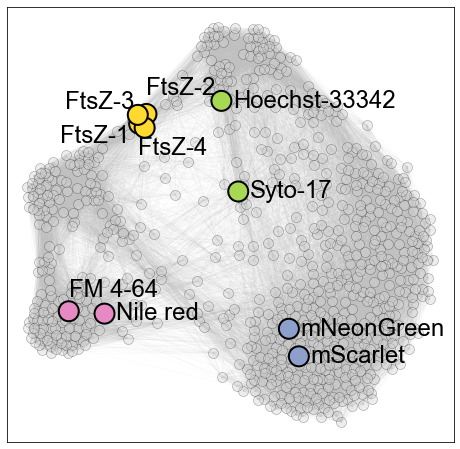

In [8]:
# reference entries

# network with labels
fig=plt.figure(figsize=(8,8))
#nodes = nx.draw_networkx_nodes(g,pos=pos,node_color=clusters.labels_[np.array(g.nodes)],
                               #alpha=0.8,node_size=120,weight='weight',cmap='Set3',lw=0.05)
#nodes.set_edgecolor('black')
ax = plt.subplot(111)
edges = nx.draw_networkx_edges(g,pos=pos,edge_color='silver',alpha=0.1, width=0.5)
plt.scatter(positions[0],positions[1],s=100,
            c='lightgrey',
            ec='black',lw=0.5,alpha=0.4)

idx = np.array([761,762,774,775,776,777,764,767,769,773])-1
labels = ['Nile red','Syto-17','mNeonGreen','mScarlet','FM 4-64',
          'Hoechst-33342','FtsZ-1','FtsZ-2','FtsZ-3','FtsZ-4']
colorlabels = [3,4,2,2,3,4,5,5,5,5]
plt.scatter(positions[0,idx],positions[1,idx],s=400,
            c=cm.get_cmap('Set2')(colorlabels), 
            ec='black',lw=2,alpha=1)

offsets = [[0.05,0],[0.05,0],[0.05,0],
           [0.05,0],[0,0.08],[0.05,0],
           [-0.35,-0.05],[0.0,0.1],[-0.35,0.1],[0,-0.13]]
for i in range(len(idx)):
    x,y = offsets[i]
    plt.text(positions[0,idx[i]]+x,positions[1,idx[i]]+y,s=labels[i],fontname='Arial',
             fontsize=24,ha='left',va='center')

plt.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    left=False,
                    right=False,
                    labelbottom=False,
                    labelleft=False) # labels along the bottom edge are off
#plt.legend(prop={'family':'Arial','size':15},loc=4)
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/composite_network_labeled_withref.png',
            dpi=160,bbox_inches='tight',transparent=True)

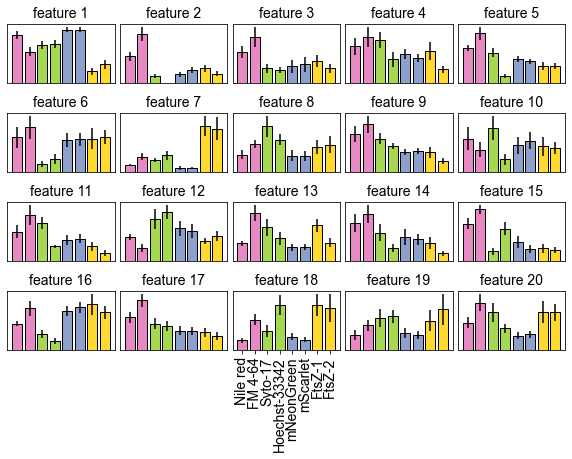

In [9]:
#reshaped_features = np.load('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/REDO_NMF_output/NMF_regrouped.npy')

idx = np.array([761,762,774,775,776,777,764,767,769,773])-1
retrieve_idx = [0,4,1,5,2,3,6,7]
labels = ['Nile red','Syto-17','mNeonGreen','mScarlet','FM 4-64',
          'Hoechst-33342','FtsZ-1','FtsZ-2','FtsZ-3','FtsZ-4']
colorlabels = [3, 3, 4, 4, 2, 2, 5, 5]
fig=plt.figure(figsize=(10,6))
grids=gs(4,5,hspace=0.5,wspace=0.05)
counter=0
for x in range(4):
    for y in range(5):
        i = x*5+y
        ax=fig.add_subplot(grids[x,y])
        feature_d = reshaped[idx[retrieve_idx],:,i]
        mean_v = np.max(feature_d,axis=1)
        std_v = np.std(feature_d,axis=1)
        for j in range(8):
            ax.bar(x=j,height=mean_v[j],fc=cm.get_cmap('Set2')(colorlabels[j]),
               ec='black',yerr=std_v[j])
        if x==3 and y==2:
            plt.tick_params(axis='y',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        left=False,
                        right=False,
                        labelbottom=True,
                        labelleft=False) # labels along the bottom edge are off
            ax.set_xticks(np.arange(8))
            ax.set_xticklabels(labels=[labels[retrieve_idx[x]] for x in range(8)],
                       rotation=90,fontname='Arial',fontsize=14,va='top',ha='center')
        else:
            plt.tick_params(axis='both',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        left=False,
                        right=False,
                        labelbottom=False,
                        labelleft=False) # labels along the bottom edge are off
        ax.set_title('feature {}'.format(i+1),fontsize=14,fontname='Arial')
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/ref_featureprofile_full.png',
            dpi=160,bbox_inches='tight',transparent=True)

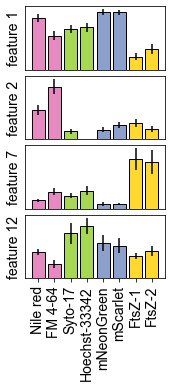

In [11]:
idx = np.array([761,762,774,775,776,777,764,767,769,773])-1
retrieve_idx = [0,4,1,5,2,3,6,7]
labels = ['Nile red','Syto-17','mNeonGreen','mScarlet','FM 4-64','Hoechst-33342','FtsZ-1','FtsZ-2','FtsZ-3','FtsZ-4']
colorlabels = [3, 3, 4, 4, 2, 2, 5, 5]
fig=plt.figure(figsize=(2.5,5))
grids=gs(4,3,hspace=0.1)
counter=0
for i in [0,1,6,11]:
    ax=fig.add_subplot(grids[counter,:])
    feature_d = reshaped[idx[retrieve_idx],:,i]
    mean_v = np.max(feature_d,axis=1)
    std_v = np.std(feature_d,axis=1)
    for j in range(8):
        ax.bar(x=j,height=mean_v[j],fc=cm.get_cmap('Set2')(colorlabels[j]),
               ec='black',yerr=std_v[j])
    if counter < 3:
        plt.tick_params(
                        axis='both',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        left=False,
                        right=False,
                        labelbottom=False,
                        labelleft=False) # labels along the bottom edge are off
    else:
        plt.tick_params(axis='y',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        left=False,
                        right=False,
                        labelbottom=True,
                        labelleft=False) # labels along the bottom edge are off
        ax.set_xticks(np.arange(8))
        ax.set_xticklabels(labels=[labels[retrieve_idx[x]] for x in range(8)],
                           rotation=90,fontname='Arial',fontsize=14,va='top',ha='center')
    ax.set_ylabel('feature {}'.format(i+1),fontsize=14,fontname='Arial')
    counter+=1
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/ref_featureprofile.png',
           dpi=160,bbox_inches='tight',transparent=True)

/Users/jz-rolling/Desktop/OMEGA/venv/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jz-rolling/Desktop/OMEGA/venv/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


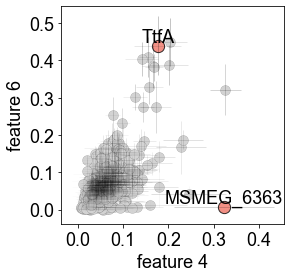

In [12]:
from matplotlib import patches
from matplotlib.collections import LineCollection

fig = plt.figure(figsize=(4,4))
ax=plt.subplot(111)

ebars = []
colors = []

input_data = reshaped.copy()
averaged = np.average(input_data,axis=1)
for i in range(len(input_data)):
    xmean = np.average(input_data[i,:,3])
    ymean = np.average(input_data[i,:,5])
    xerr = np.std(input_data[i,:,3])
    yerr = np.std(input_data[i,:,5])
    #ax.plot([xmean-xerr,xmean+xerr],[ymean,ymean],c='black',lw=1,alpha=xmean)
    #ax.plot([xmean,xmean],[ymean-yerr,ymean+yerr],c='black',lw=1,alpha=ymean)
    ebars.append([(xmean-xerr,ymean),(xmean+xerr,ymean)])
    ebars.append([(xmean,ymean-yerr),(xmean,ymean+yerr)])
    colors.append([0,0,0,xmean])
    colors.append([0,0,0,ymean])

lines = LineCollection(ebars,color=colors,lw=0.5)
ax.add_collection(lines)
    
ax.scatter(averaged[:,3],averaged[:,5],fc='lightgrey',ec='black',lw=0.1,s=100)
str1 = np.where((averaged[:,3]>0.3)&(averaged[:,5]<0.1))[0]
str2 = np.where((averaged[:,3]<0.19)&(averaged[:,5]>0.43))[0]
k1 = df.iloc[str1[0]]['key']
k2 = df.iloc[str2[0]]['key']

ax.scatter(averaged[str1,3],averaged[str1,5],fc='salmon',alpha=0.8,s=150,ec='black',lw=1)
ax.scatter(averaged[str2,3],averaged[str2,5],fc='salmon',alpha=0.8,s=150,ec='black',lw=1)

ax.text(averaged[str1,3],averaged[str1,5],'MSMEG_6363',
        ha='center',va='bottom',fontname='Arial',fontsize=18)
ax.text(averaged[str2,3],averaged[str2,5],'TtfA',
        ha='center',va='bottom',fontname='Arial',fontsize=18)

#ax.set_ylim(0,0.5);
#ax.set_xlim(0,0.4);
ax.set_xlabel('feature 4',fontname='Arial',fontsize=18)
ax.set_ylabel('feature 6',fontname='Arial',fontsize=18)
ax.set_xticklabels([round(x,1) for x in ax.get_xticks()],fontname='Arial',fontsize=18);
ax.set_yticklabels([round(y,1) for y in ax.get_yticks()],fontname='Arial',fontsize=18);

plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/feature4-6.png',transparent=True,
            bbox_inches='tight',dpi=160)



/Users/jz-rolling/Desktop/OMEGA/venv/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator


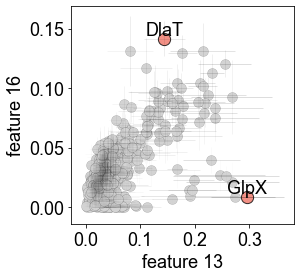

In [25]:
from matplotlib import patches
from matplotlib.collections import LineCollection

fig2 = plt.figure(figsize=(4,4))
ax=plt.subplot(111)

ebars = []
colors = []

input_data = reshaped.copy()
averaged = np.average(input_data,axis=1)
for i in range(len(input_data)):
    xmean = np.average(input_data[i,:,12])
    ymean = np.average(input_data[i,:,15])
    xerr = np.std(input_data[i,:,12])
    yerr = np.std(input_data[i,:,15])
    #ax.plot([xmean-xerr,xmean+xerr],[ymean,ymean],c='black',lw=1,alpha=xmean)
    #ax.plot([xmean,xmean],[ymean-yerr,ymean+yerr],c='black',lw=1,alpha=ymean)
    ebars.append([(xmean-xerr,ymean),(xmean+xerr,ymean)])
    ebars.append([(xmean,ymean-yerr),(xmean,ymean+yerr)])
    colors.append([0,0,0,xmean])
    colors.append([0,0,0,ymean])


lines = LineCollection(ebars,color=colors,lw=0.5)
ax.add_collection(lines)
    
ax.scatter(averaged[:,12],averaged[:,15],fc='lightgrey',ec='black',lw=0.1,s=100)
str1 = np.where((averaged[:,12]>0.28)&(averaged[:,15]<0.02))[0]
str2 = np.where((averaged[:,12]<0.2)&(averaged[:,15]>0.135))[0]


k1 = df.iloc[str1[0]]['key']
k2 = df.iloc[str2[0]]['key']


ax.scatter(averaged[str1,12],averaged[str1,15],fc='salmon',alpha=0.8,s=150,ec='black',lw=1)
ax.scatter(averaged[str2,12],averaged[str2,15],fc='salmon',alpha=0.8,s=150,ec='black',lw=1)

ax.text(averaged[str1,12],averaged[str1,15],'GlpX',
        ha='center',va='bottom',fontname='Arial',fontsize=18)
ax.text(averaged[str2,12],averaged[str2,15],'DlaT',
        ha='center',va='bottom',fontname='Arial',fontsize=18)


#ax.set_ylim(0,0.5);
#ax.set_xlim(0,0.4);
ax.set_xlabel('feature 13',fontname='Arial',fontsize=18)
ax.set_ylabel('feature 16',fontname='Arial',fontsize=18)
ax.set_xticklabels([round(x,1) for x in ax.get_xticks()],fontname='Arial',fontsize=18);
ax.set_yticks([0,0.05,0.1,0.15])
ax.set_yticklabels([str(round(y,2)).ljust(4,'0') for y in ax.get_yticks()],fontname='Arial',fontsize=18);

plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/feature13-16.png',transparent=True,
            bbox_inches='tight',dpi=160)



